Boombox exercise - Solution

In [ ]:
!pip install linearmodels

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.formula.api import ols
from linearmodels.panel import PanelOLS

# Set up modern styling
sns.set_theme(style="whitegrid")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.9 MB/s eta 0:00:00


# 1. Import and format the dataset

In [ ]:
# Load and prepare data

file_path = 'https://www.dropbox.com/scl/fi/6hvfnl04zwik484zm3n2r/boombox.csv?rlkey=kxyggs1y03d56g5q7qd3pdknj&dl=1'

# Load the data
try:
    df = pd.read_csv(file_path)
except UnicodeDecodeError:
    df = pd.read_csv(file_path, encoding='latin-1')

df.head()

,curators_earned,ib_curators_earned,artists_earned,ib_artists_earned,active_artists_earned,ib_active_artists_earned,inactive_artists_earned,ib_inactive_artists_earned,curators_other,ib_curators_other,...,country,week,curators,ib_curators,artists,ib_artists,active_artists,ib_active_artists,inactive_artists,ib_inactive_artists
0,0,0,0,0,0,0,0,0,0,0,...,afghanistan,2019w23,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,afghanistan,2019w33,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,afghanistan,2019w41,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,afghanistan,2019w42,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,afghanistan,2019w45,0,0,0,0,0,0,0,0


In [ ]:
# Convert week format (2019w33) to datetime
def convert_week_to_date(week_str):
    year = int(week_str[:4])
    week_num = int(week_str[5:])
    return pd.to_datetime(f"{year}-01-01") + pd.Timedelta(weeks=week_num-1)

# Apply conversion and create additional time-related columns
df['date'] = df['week'].apply(convert_week_to_date)
df['year'] = df['date'].dt.year
df['week_num'] = df['date'].dt.isocalendar().week

# Sort the dataframe by date
df = df.sort_values('date')

# Create a numeric week column for plotting
df['week_numeric'] = range(len(df))

In [ ]:
# Display basic information about the dataset
print("Dataset Overview:")
print(f"Number of rows: {len(df)}")
print(f"Number of unique countries: {df['country'].nunique()}")
print(f"Date range: from {df['date'].min()} to {df['date'].max()}")
df.describe()

Dataset Overview:
Number of rows: 21240
Number of unique countries: 177
Date range: from 2019-06-04 00:00:00 to 2022-06-25 00:00:00


,curators_earned,ib_curators_earned,artists_earned,ib_artists_earned,active_artists_earned,ib_active_artists_earned,inactive_artists_earned,ib_inactive_artists_earned,curators_other,ib_curators_other,...,artists,ib_artists,active_artists,ib_active_artists,inactive_artists,ib_inactive_artists,date,year,week_num,week_numeric
count,21240.000000,21240.000000,21240.000000,21240.000000,21240.000000,21240.000000,21240.000000,21240.000000,21240.00000,21240.000000,...,21240.000000,21240.000000,21240.000000,21240.000000,21240.000000,21240.000000,21240,21240.000000,21240.0,21240.000000
mean,0.174953,8.201036,0.750989,15.491902,0.233992,5.133051,0.516996,10.358851,0.02806,1.592891,...,2.457627,47.829944,0.553814,13.203484,1.903814,34.626460,2021-04-19 00:23:59.999999744,2020.808333,26.7,10619.500000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019-06-04 00:00:00,2019.000000,1.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2020-10-05 06:00:00,2020.000000,14.0,5309.750000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2021-05-03 12:00:00,2021.000000,26.0,10619.500000
75%,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,...,0.000000,3.000000,0.000000,1.000000,0.000000,2.000000,2021-11-27 18:00:00,2021.000000,40.25,15929.250000
max,27.000000,768.000000,175.000000,4336.000000,72.000000,1647.000000,107.000000,2689.000000,7.00000,137.000000,...,783.000000,14090.000000,121.000000,4175.000000,683.000000,11018.000000,2022-06-25 00:00:00,2022.000000,53.0,21239.000000
std,0.993312,45.607938,6.393790,149.178892,2.175014,53.848055,4.393279,96.457748,0.24638,8.225181,...,23.402460,479.825108,4.919123,138.718693,19.034774,347.564425,NaN,0.839621,15.111389,6131.604195


# 2. Counterfactual simulations

### Create the different scenarios and log-transform the variables

In [ ]:
# First ensure the data is sorted by country and date
df = df.sort_values(['country', 'date'])

# Create artists and curators variables in scenarios with:
# 1. no earned media
df['artists_no_earned'] = df['artists'] - df['artists_earned']
df['curators_no_earned'] = df['curators'] - df['curators_earned']
df['ib_artists_no_earned'] = df['ib_artists'] - df['ib_artists_earned']
df['ib_curators_no_earned'] = df['ib_curators'] - df['ib_curators_earned']

# 2. no owned media
df['artists_no_owned'] = df['artists'] - df['artists_owned']
df['curators_no_owned'] = df['curators'] - df['curators_owned']
df['ib_artists_no_owned'] = df['ib_artists'] - df['ib_artists_owned']
df['ib_curators_no_owned'] = df['ib_curators'] - df['ib_curators_owned']

#3. no paid media
df['artists_no_paid'] = df['artists'] - df['artists_paid']
df['curators_no_paid'] = df['curators'] - df['curators_paid']
df['ib_artists_no_paid'] = df['ib_artists'] - df['ib_artists_paid']
df['ib_curators_no_paid'] = df['ib_curators'] - df['ib_curators_paid']

# Create lag variables (month-1 variables) using groupby and shift
df['artists-1'] = df.groupby('country')['artists'].shift(1)
df['artists_no_earned-1'] = df.groupby('country')['artists_no_earned'].shift(1)
df['artists_no_owned-1'] = df.groupby('country')['artists_no_owned'].shift(1)
df['artists_no_paid-1'] = df.groupby('country')['artists_no_paid'].shift(1)

df['curators-1'] = df.groupby('country')['curators'].shift(1)
df['curators_no_earned-1'] = df.groupby('country')['curators_no_earned'].shift(1)
df['curators_no_owned-1'] = df.groupby('country')['curators_no_owned'].shift(1)
df['curators_no_paid-1'] = df.groupby('country')['curators_no_paid'].shift(1)

# Take log of dependent/independent variables (adding 1 to handle zeros)
log_vars = ['artists','curators','artists-1','curators-1','artists_no_earned','curators_no_earned','artists_no_owned','curators_no_owned','artists_no_paid','curators_no_paid','artists_no_earned-1','curators_no_earned-1','artists_no_owned-1','curators_no_owned-1','artists_no_paid-1','curators_no_paid-1','ib_artists', 'ib_curators','ib_artists_no_earned','ib_curators_no_earned','ib_artists_no_owned','ib_curators_no_owned','ib_artists_no_paid','ib_curators_no_paid']
for var in log_vars:
    df[f'log_{var}'] = np.log(df[var] + 1)


### Fixed effects regressions to estimate network effects for artists and curators

In [ ]:
# For panel regression, we need a multi-index with country and time
df.set_index(['country', 'date'], inplace=True)

# Artists model with fixed effects
artist_fe = PanelOLS(
    dependent=df['log_artists'],
    exog=df[['log_artists-1', 'log_ib_curators']],
    entity_effects=True,  # country fixed effects
    time_effects=True     # time fixed effects
).fit()

print("\nFixed Effects Results - Artists:")
print(artist_fe.summary.tables[1])

# Curators model with fixed effects
artist_fe = PanelOLS(
    dependent=df['log_curators'],
    exog=df[['log_curators-1', 'log_ib_artists']],
    entity_effects=True,  # country fixed effects
    time_effects=True     # time fixed effects
).fit()

print("\nFixed Effects Results - Curators:")
print(artist_fe.summary.tables[1])

/usr/local/lib/python3.11/dist-packages/linearmodels/panel/model.py:1260: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)



Fixed Effects Results - Artists:
                                Parameter Estimates                                
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
log_artists-1       0.6810     0.0051     133.08     0.0000      0.6710      0.6910
log_ib_curators     0.1399     0.0044     31.469     0.0000      0.1312      0.1486


/usr/local/lib/python3.11/dist-packages/linearmodels/panel/model.py:1260: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)



Fixed Effects Results - Curators:
                               Parameter Estimates                                
                Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
----------------------------------------------------------------------------------
log_curators-1     0.3127     0.0066     47.397     0.0000      0.2997      0.3256
log_ib_artists     0.0511     0.0022     23.557     0.0000      0.0468      0.0553


### Use fixed-effects regressions estimates to predict/simulate counterfactual scenarios

In [ ]:
# Get artists predictions
df['predicted_artists'] = artist_fe.predict(df[['log_artists-1', 'log_ib_curators']])
df['predicted_artists_wo_earned'] = artist_fe.predict(df[['log_artists_no_earned-1', 'log_ib_curators_no_earned']])
df['predicted_artists_wo_owned'] = artist_fe.predict(df[['log_artists_no_owned-1', 'log_ib_curators_no_owned']])
df['predicted_artists_wo_paid'] = artist_fe.predict(df[['log_artists_no_paid-1', 'log_ib_curators_no_paid']])

# Get curators predictions
df['predicted_curators'] = artist_fe.predict(df[['log_curators-1', 'log_ib_artists']])
df['predicted_curators_wo_earned'] = artist_fe.predict(df[['log_curators_no_earned-1', 'log_ib_artists_no_earned']])
df['predicted_curators_wo_owned'] = artist_fe.predict(df[['log_curators_no_owned-1', 'log_ib_artists_no_owned']])
df['predicted_curators_wo_paid'] = artist_fe.predict(df[['log_curators_no_paid-1', 'log_ib_artists_no_paid']])

# Plot the results of the simulations

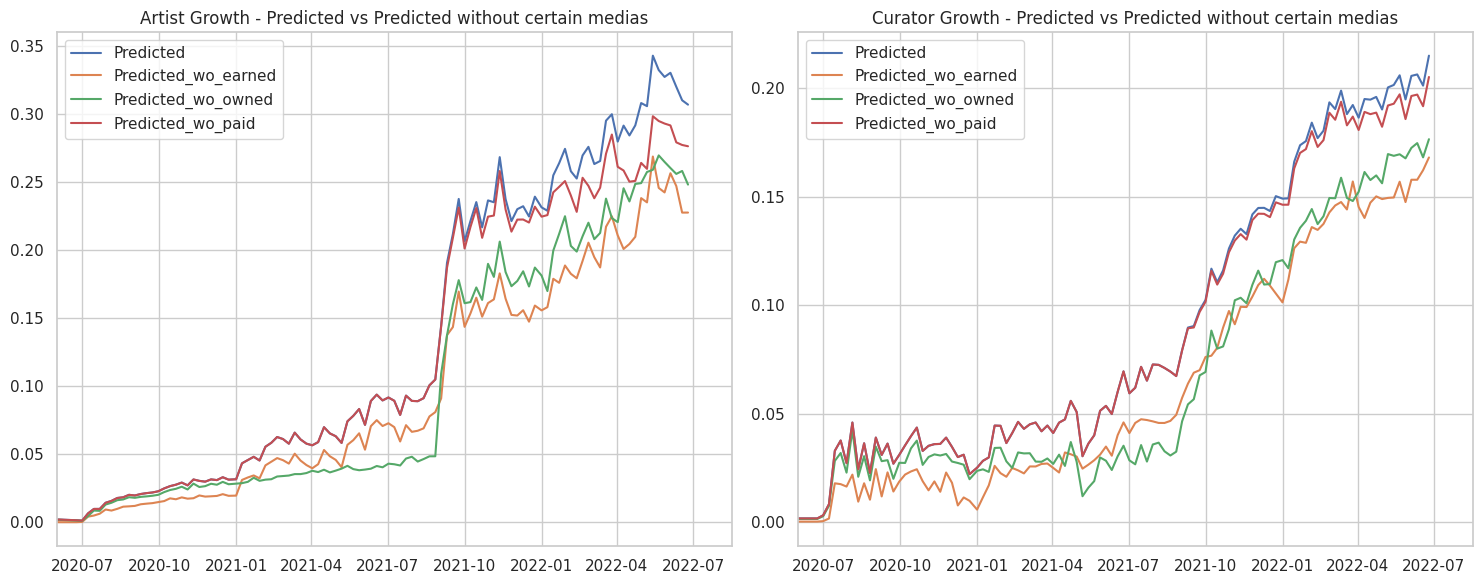

In [ ]:
# Reset index for plotting
df.reset_index(inplace=True)

# Plot actual vs predicted values
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Artists plot
monthly_artists = df.groupby('date')[['predicted_artists', 'predicted_artists_wo_earned', 'predicted_artists_wo_owned', 'predicted_artists_wo_paid']].mean()
ax1.plot(monthly_artists.index, monthly_artists['predicted_artists'], label='Predicted')
ax1.plot(monthly_artists.index, monthly_artists['predicted_artists_wo_earned'], label='Predicted_wo_earned')
ax1.plot(monthly_artists.index, monthly_artists['predicted_artists_wo_owned'], label='Predicted_wo_owned')
ax1.plot(monthly_artists.index, monthly_artists['predicted_artists_wo_paid'], label='Predicted_wo_paid')
ax1.set_title('Artist Growth - Predicted vs Predicted without certain medias')
ax1.legend()
ax1.grid(True)
#change x axis to start june 2020
ax1.set_xlim(pd.to_datetime('2020-06-01'))

# Curators plot
monthly_curators = df.groupby('date')[['predicted_curators', 'predicted_curators_wo_earned', 'predicted_curators_wo_owned', 'predicted_curators_wo_paid']].mean()
ax2.plot(monthly_curators.index, monthly_curators['predicted_curators'], label='Predicted')
ax2.plot(monthly_curators.index, monthly_curators['predicted_curators_wo_earned'], label='Predicted_wo_earned')
ax2.plot(monthly_curators.index, monthly_curators['predicted_curators_wo_owned'], label='Predicted_wo_owned')
ax2.plot(monthly_curators.index, monthly_curators['predicted_curators_wo_paid'], label='Predicted_wo_paid')
ax2.set_title('Curator Growth - Predicted vs Predicted without certain medias')
ax2.legend()
ax2.grid(True)
#change x axis to start june 2020
ax2.set_xlim(pd.to_datetime('2020-06-01'))

plt.tight_layout()
plt.show()

# Customized plot style:

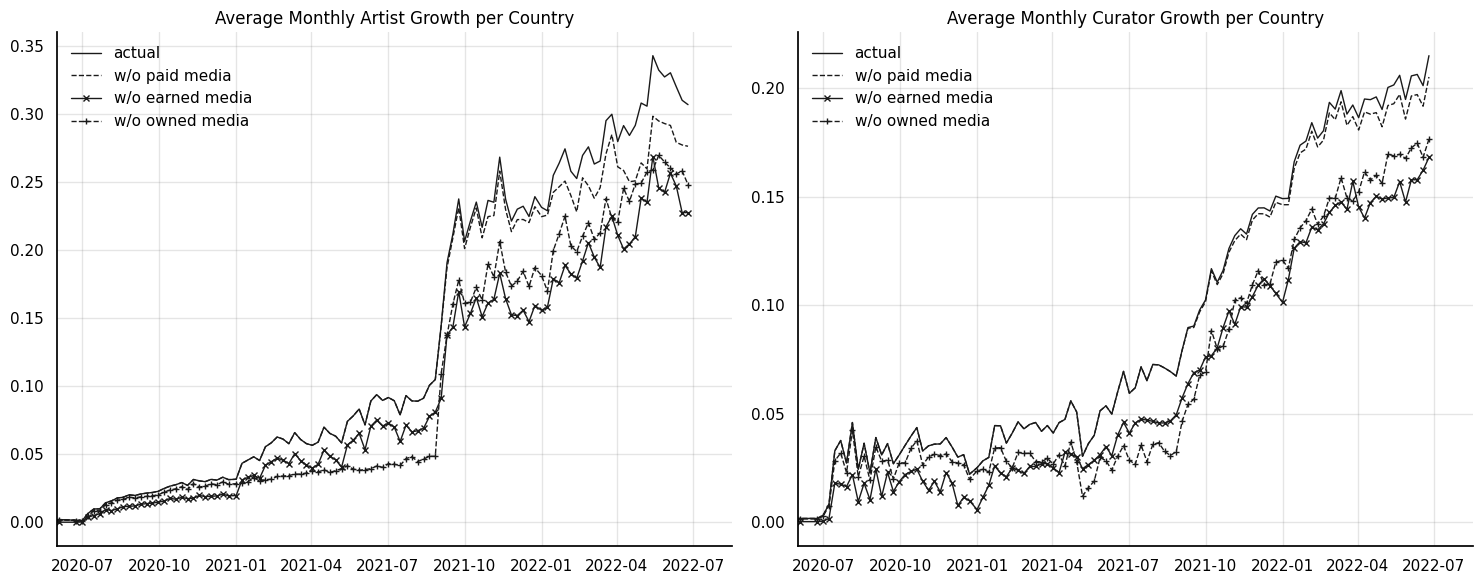

In [ ]:
# Reset index for plotting
df.reset_index(inplace=True)

plt.style.use('grayscale')

# Create the plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.patch.set_facecolor('white')  # Set figure background to white
ax1.set_facecolor('white')  # Set plot background to white
ax2.set_facecolor('white')

# Artists plot
monthly_artists = df.groupby('date')[['predicted_artists', 'predicted_artists_wo_earned',
                                    'predicted_artists_wo_owned', 'predicted_artists_wo_paid']].mean()

# Plot with specific line styles
ax1.plot(monthly_artists.index, monthly_artists['predicted_artists'],
         'k-', linewidth=1, label='actual')
ax1.plot(monthly_artists.index, monthly_artists['predicted_artists_wo_paid'],
         'k--', linewidth=1, label='w/o paid media')
ax1.plot(monthly_artists.index, monthly_artists['predicted_artists_wo_earned'],
         'k-', marker='x', linewidth=1, markersize=4, label='w/o earned media')
ax1.plot(monthly_artists.index, monthly_artists['predicted_artists_wo_owned'],
         'k--', marker='+', linewidth=1, markersize=4, label='w/o owned media')

# Customize grid and appearance
ax1.grid(True, color='grey', linestyle='-', alpha=0.2)
ax1.set_title('Average Monthly Artist Growth per Country')
ax1.set_xlim(pd.to_datetime('2020-06-01'))
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Similar for curators plot
monthly_curators = df.groupby('date')[['predicted_curators', 'predicted_curators_wo_earned',
                                     'predicted_curators_wo_owned', 'predicted_curators_wo_paid']].mean()

ax2.plot(monthly_curators.index, monthly_curators['predicted_curators'],
         'k-', linewidth=1, label='actual')
ax2.plot(monthly_curators.index, monthly_curators['predicted_curators_wo_paid'],
         'k--', linewidth=1, label='w/o paid media')
ax2.plot(monthly_curators.index, monthly_curators['predicted_curators_wo_earned'],
         'k-', marker='x', linewidth=1, markersize=4, label='w/o earned media')
ax2.plot(monthly_curators.index, monthly_curators['predicted_curators_wo_owned'],
         'k--', marker='+', linewidth=1, markersize=4, label='w/o owned media')

ax2.grid(True, color='grey', linestyle='-', alpha=0.2)
ax2.set_title('Average Monthly Curator Growth per Country')
ax2.set_xlim(pd.to_datetime('2020-06-01'))
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Customize legends
ax1.legend(frameon=False)
ax2.legend(frameon=False)

plt.tight_layout()
plt.show()

# Alternative specifications


Fixed Effects Results - Artists:
                                Parameter Estimates                                
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
log_ib_artists      0.5001     0.0042     118.29     0.0000      0.4918      0.5084
log_ib_curators    -0.0010     0.0054    -0.1875     0.8513     -0.0116      0.0096

Fixed Effects Results - Curators:
                                Parameter Estimates                                
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
log_ib_curators     0.1836     0.0035     51.758     0.0000      0.1767      0.1906
log_ib_artists     -0.0180     0.0028    -6.4623     0.0000     -0.0234     -0.0125


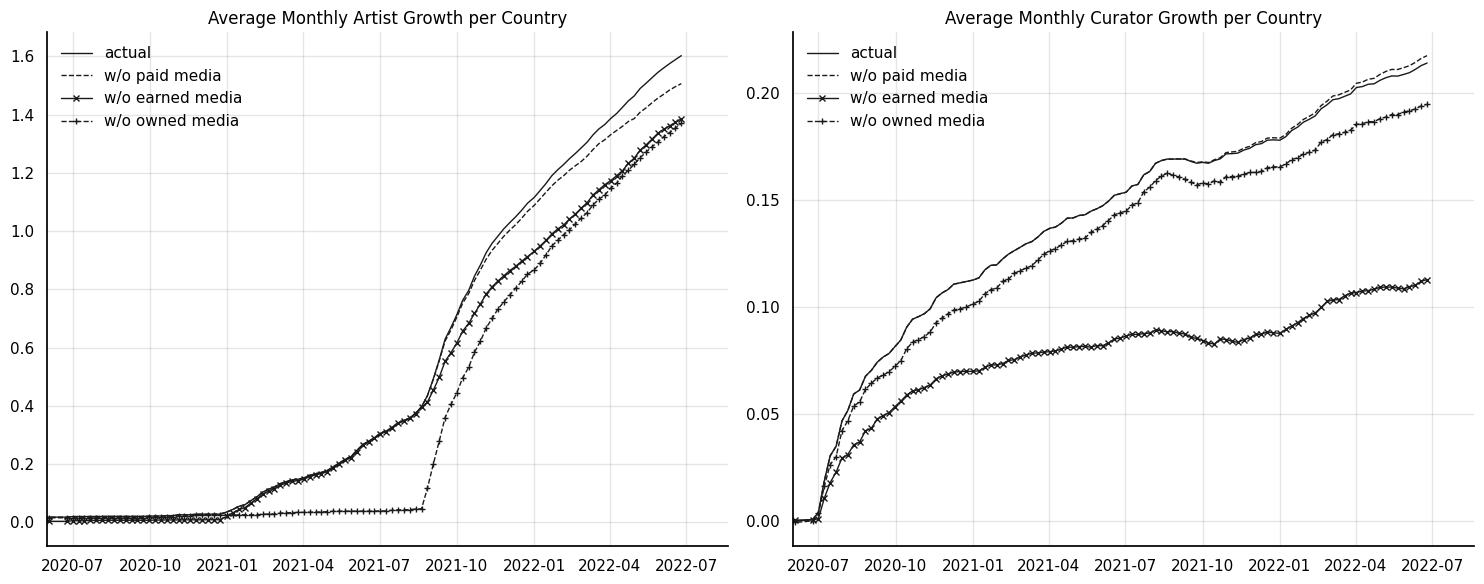

In [ ]:
# For panel regression, we need a multi-index with country and time
df.set_index(['country', 'date'], inplace=True)

# Artists model with fixed effects (alt specification)
artist_fe = PanelOLS(
    dependent=df['log_artists'],
    exog=df[['log_ib_artists', 'log_ib_curators']],
    entity_effects=True,  # country fixed effects
    time_effects=True     # time fixed effects
).fit()

print("\nFixed Effects Results - Artists:")
print(artist_fe.summary.tables[1])


# Get predictions

df['predicted_artists'] = artist_fe.predict(df[['log_ib_artists', 'log_ib_curators']])
df['predicted_artists_wo_earned'] = artist_fe.predict(df[['log_ib_artists_no_earned', 'log_ib_curators_no_earned']])
df['predicted_artists_wo_owned'] = artist_fe.predict(df[['log_ib_artists_no_owned', 'log_ib_curators_no_owned']])
df['predicted_artists_wo_paid'] = artist_fe.predict(df[['log_ib_artists_no_paid', 'log_ib_curators_no_paid']])

# Curators model with fixed effects (alt specification)
artist_fe = PanelOLS(
    dependent=df['log_curators'],
    exog=df[['log_ib_curators', 'log_ib_artists']],
    entity_effects=True,  # country fixed effects
    time_effects=True     # time fixed effects
).fit()

print("\nFixed Effects Results - Curators:")
print(artist_fe.summary.tables[1])

# Get predictions
df['predicted_curators'] = artist_fe.predict(df[['log_ib_curators', 'log_ib_artists']])
df['predicted_curators_wo_earned'] = artist_fe.predict(df[['log_ib_curators_no_earned', 'log_ib_artists_no_earned']])
df['predicted_curators_wo_owned'] = artist_fe.predict(df[['log_ib_curators_no_owned', 'log_ib_artists_no_owned']])
df['predicted_curators_wo_paid'] = artist_fe.predict(df[['log_ib_curators_no_paid', 'log_ib_artists_no_paid']])

# Reset index for plotting
df.reset_index(inplace=True)

plt.style.use('grayscale')

# Create the plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.patch.set_facecolor('white')  # Set figure background to white
ax1.set_facecolor('white')  # Set plot background to white
ax2.set_facecolor('white')

# Artists plot
monthly_artists = df.groupby('date')[['predicted_artists', 'predicted_artists_wo_earned',
                                    'predicted_artists_wo_owned', 'predicted_artists_wo_paid']].mean()

# Plot with specific line styles
ax1.plot(monthly_artists.index, monthly_artists['predicted_artists'],
         'k-', linewidth=1, label='actual')
ax1.plot(monthly_artists.index, monthly_artists['predicted_artists_wo_paid'],
         'k--', linewidth=1, label='w/o paid media')
ax1.plot(monthly_artists.index, monthly_artists['predicted_artists_wo_earned'],
         'k-', marker='x', linewidth=1, markersize=4, label='w/o earned media')
ax1.plot(monthly_artists.index, monthly_artists['predicted_artists_wo_owned'],
         'k--', marker='+', linewidth=1, markersize=4, label='w/o owned media')

# Customize grid and appearance
ax1.grid(True, color='grey', linestyle='-', alpha=0.2)
ax1.set_title('Average Monthly Artist Growth per Country')
ax1.set_xlim(pd.to_datetime('2020-06-01'))
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Similar for curators plot
monthly_curators = df.groupby('date')[['predicted_curators', 'predicted_curators_wo_earned',
                                     'predicted_curators_wo_owned', 'predicted_curators_wo_paid']].mean()

ax2.plot(monthly_curators.index, monthly_curators['predicted_curators'],
         'k-', linewidth=1, label='actual')
ax2.plot(monthly_curators.index, monthly_curators['predicted_curators_wo_paid'],
         'k--', linewidth=1, label='w/o paid media')
ax2.plot(monthly_curators.index, monthly_curators['predicted_curators_wo_earned'],
         'k-', marker='x', linewidth=1, markersize=4, label='w/o earned media')
ax2.plot(monthly_curators.index, monthly_curators['predicted_curators_wo_owned'],
         'k--', marker='+', linewidth=1, markersize=4, label='w/o owned media')

ax2.grid(True, color='grey', linestyle='-', alpha=0.2)
ax2.set_title('Average Monthly Curator Growth per Country')
ax2.set_xlim(pd.to_datetime('2020-06-01'))
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Customize legends
ax1.legend(frameon=False)
ax2.legend(frameon=False)

plt.tight_layout()
plt.show()